# Analysing Employee Performance for Hr Analytics Using Python and MySQL


## About the project:
You will be using a real-world dataset of the Employees records to complete this project. This project intends to evaluate the provided dataset, solving business problems on this dataset and mining information insights. 

## Project Description
This project will train you how to use SQL to analyze a real-world database, how to extract the most useful information from the dataset, how to pre-process the data using Python for improved performance, and how to use a structured query language to retrieve useful information from the database.


## Module1: Data Pre-processing
In this task you will be working on handling null values, deletion or transformation of irrelevant values, data type transformation, removing duplicates and data validations. Once you have completed this task, you will get a refined and cleaner data set for further analysis.

### Steps to perform Data Pre-processing:

- **Step 1**: Removing duplicate rows.
- **Step 2**: Removing rows for which numeric columns are having irrelevant data type values
- **Step 3**: Remove irrelevant values from each column if any. Validation all values for a column, Check for any inconsistencies or discrepancies in data types, units, or formats.Feel free to add more validation checks which you might feel necessary for the dataset’s integrity
- **Step 4**: Export the cleaned dataset as a .csv file: prefer UTF-8 encoding.
- **Step 5**: Convert the pre-processed dataset into an SQL file. 
- **Step 6**: Manually generate a table by utilizing the database information provided in the "Database Info" tab.

## Module 2: Run SQL queries

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Loading Dataset


In [2]:
emp = pd.read_csv("F:\Hicounselor\HR analytics\dataset\employees_final_dataset clean.csv")

### Basic information about dataset

In [3]:
emp.head() # top 5 rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
emp.tail() # last 5 rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17416,64573,HR,region_7,Bachelors,f,referred,1,35,5.0,4,1,0,81


In [5]:
emp.shape

(17417, 13)

- There are 17417 rows and 13 columns in our dataset

In [6]:
emp.info() #dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [7]:
emp.columns # Names of columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [8]:
emp.nunique() # unique values in columns

employee_id              17414
department                   9
region                      34
education                    3
gender                       2
recruitment_channel          3
no_of_trainings              9
age                         41
previous_year_rating         5
length_of_service           34
KPIs_met_more_than_80        2
awards_won                   2
avg_training_score          61
dtype: int64

In [9]:
emp.describe() # statistical information

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


#### Step 1: Removing duplicate rows.

In [10]:
emp.duplicated().sum()

2

- 2 rows are duplicated

In [11]:
#to show duplicated rows
emp[emp.duplicated()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


### Remove this duplicated rows

In [12]:
emp.drop_duplicates(inplace=True)

In [13]:
#checking duplicated rows again
emp.duplicated().sum()

0

- Now removed duplicates

### Step 2: Removing rows for which numeric columns are having irrelevant data type values


In [14]:
emp.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

- All datatype is correct,here is object ,float ans integer for numerical columns.NO need to change.

### Step 3: Remove irrelevant values from each column if any. Validation all values for a column, Check for any inconsistencies or discrepancies in data types, units, or formats.Feel free to add more validation checks which you might feel necessary for the dataset’s integrity
- checking null values

In [15]:
m = emp.isnull().sum()
m

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [16]:
#blank values in %
m1 = m/len(emp)*100
m1

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.427218
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.826586
length_of_service        0.000000
KPIs_met_more_than_80    0.000000
awards_won               0.000000
avg_training_score       0.000000
dtype: float64

In [17]:
## Missing values with %
m2 = pd.concat([m,m1],axis=1,keys=['Missing','Mssing%'])
m2

,Missing,Mssing%
employee_id,0,0.000000
department,0,0.000000
region,0,0.000000
education,771,4.427218
gender,0,0.000000
recruitment_channel,0,0.000000
no_of_trainings,0,0.000000
age,0,0.000000
previous_year_rating,1363,7.826586
length_of_service,0,0.000000


- Its clearly shows only two columns having missing values
- education having 4.43%
- previous_year_rating having 7.83 %


### Missing values in Heatmap

<AxesSubplot:>

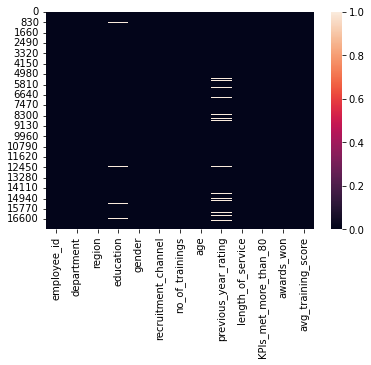

In [18]:
sns.heatmap(emp.isnull())

#### We are replacing null values in education as "Ileterate" and  in previous_year_rating with zero.
- using fillna()

In [19]:
emp.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51


In [20]:
emp.fillna({'education':'Ileterate','previous_year_rating':'0'},inplace=True)

In [21]:
# again chaecking null values
m = emp.isnull().sum()
m

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

### Step 4: Export the cleaned dataset as a .csv file: prefer UTF-8 encoding.


In [23]:
emp.to_csv("cleaned_employee_final_dataset.csv", encoding='utf-8', index=False)
